In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%pylab inline
import seaborn as sns

plt.style.use('seaborn-whitegrid')
from scipy.stats import norm


import seaborn as sns
from scipy.stats import norm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Data Management/Investigation
import pandas as pd
from pandas.api.types import CategoricalDtype # Ordering categories
import numpy as np
import missingno as miss

# Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import DecisionTreeRegressor as DT_reg
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import tree # For plotting the decision tree rules

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# Misc
import warnings
warnings.filterwarnings("ignore")

In [3]:
## import data

import os
path = os.getcwd()
print(path)
df1 = pd.read_csv('../quantifying-greenwashing/data/Data.csv')

C:\Users\madel\projects\quantifying-greenwashing


In [4]:
## merge company data, move later to clearning py
df2 = pd.read_csv('../quantifying-greenwashing/data/fortune_500_companies.csv')

df = pd.merge(df1, df2[['username','STATE', 'EMPLOYEES', 'REVENUES', 'PROFIT']], on='username', how='left')



### Describe Numeric Data

In [25]:
df.describe()

,"('shortcode', 'count')","('is_video', 'sum')","('is_video', 'mean')","('is_sponsored', 'sum')","('is_sponsored', 'mean')","('caption', 'count')","('video_view_count', 'sum')","('video_view_count', 'mean')","('likes', 'sum')","('likes', 'mean')",...,"('caption_emissions', 'std')","('caption_emissions', 'mean')","('caption_emissions', 'median')","('likely_automated', 'sum')","('likely_automated', 'std')","('likely_automated', 'mean')",environment_rating,EMPLOYEES,REVENUES,PROFIT
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,1.440000e+02,1.440000e+02,1.440000e+02,144.000000,...,144.000000,144.000000,144.0,144.000000,144.000000,144.000000,144.000000,1.440000e+02,144.000000,144.000000
mean,88.861111,54.027778,0.300951,0.444444,0.002793,177.416667,3.177131e+06,2.293494e+04,1.843222e+06,11290.219197,...,0.013420,0.001969,0.0,30.208333,0.274716,0.169623,61.291667,1.024509e+05,40620.763889,3192.741667
std,24.881147,39.945408,0.204066,3.194790,0.019492,49.688752,1.545034e+07,1.126225e+05,6.939681e+06,39135.361950,...,0.049446,0.008090,0.0,37.600564,0.154772,0.206272,10.345686,2.072071e+05,56880.991739,5595.988827
min,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000e+00,0.000000e+00,7.200000e+01,23.860000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,19.000000,4.200000e+03,5170.000000,-3615.000000
25%,100.000000,25.500000,0.140000,0.000000,0.000000,198.000000,5.405900e+04,2.828511e+02,2.830250e+04,183.674091,...,0.000000,0.000000,0.0,4.000000,0.170212,0.030000,54.750000,2.172500e+04,10716.250000,528.700000
50%,100.000000,46.000000,0.282857,0.000000,0.000000,200.000000,3.096630e+05,1.609940e+03,1.560930e+05,970.135930,...,0.000000,0.000000,0.0,10.000000,0.238083,0.060000,64.000000,5.034150e+04,20571.500000,1329.000000
75%,100.000000,80.000000,0.430455,0.000000,0.000000,200.000000,1.631744e+06,9.396626e+03,7.696815e+05,4017.787500,...,0.000000,0.000000,0.0,48.500000,0.436517,0.275000,69.250000,1.160125e+05,43456.750000,3795.750000
max,100.000000,160.000000,0.800000,34.000000,0.170000,200.000000,1.759524e+08,1.000192e+06,6.203534e+07,310176.700000,...,0.342031,0.060000,0.0,156.000000,0.501154,1.000000,76.000000,2.300000e+06,485873.000000,45687.000000


### Missing Data

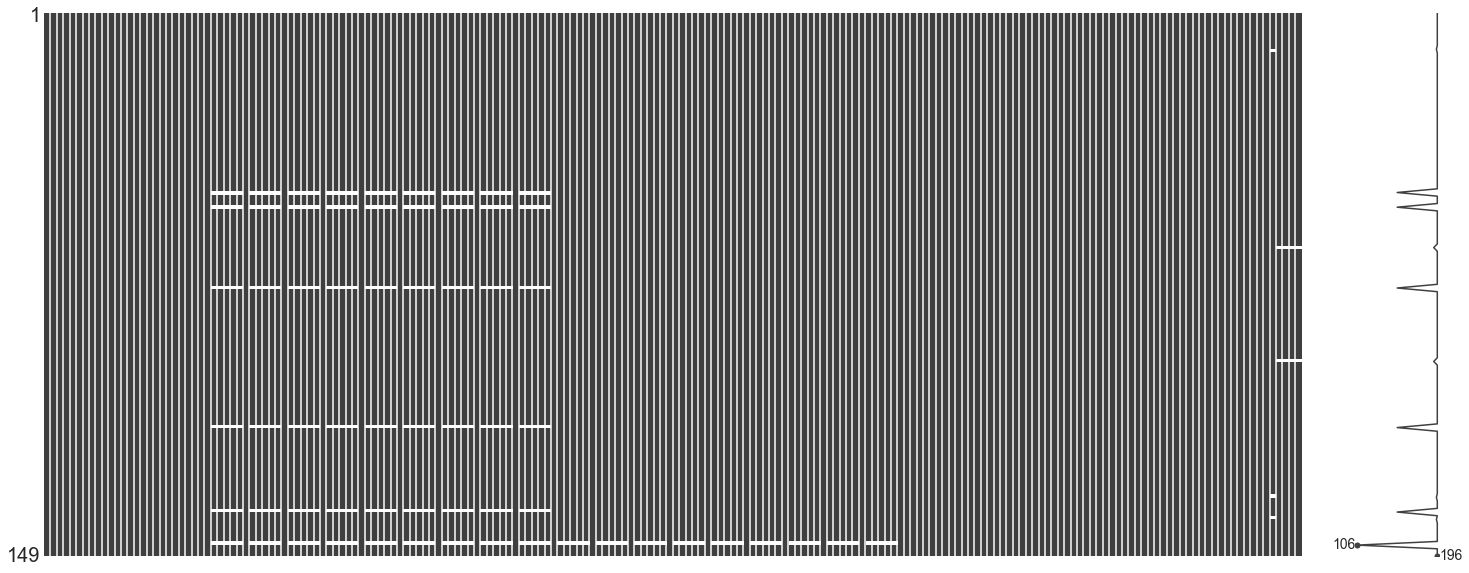

In [7]:
miss.matrix(df) 

In [10]:
## drop rows without ESG rating
df.dropna(subset=['environment_rating','EMPLOYEES', 'REVENUES', 'PROFIT'], inplace=True)

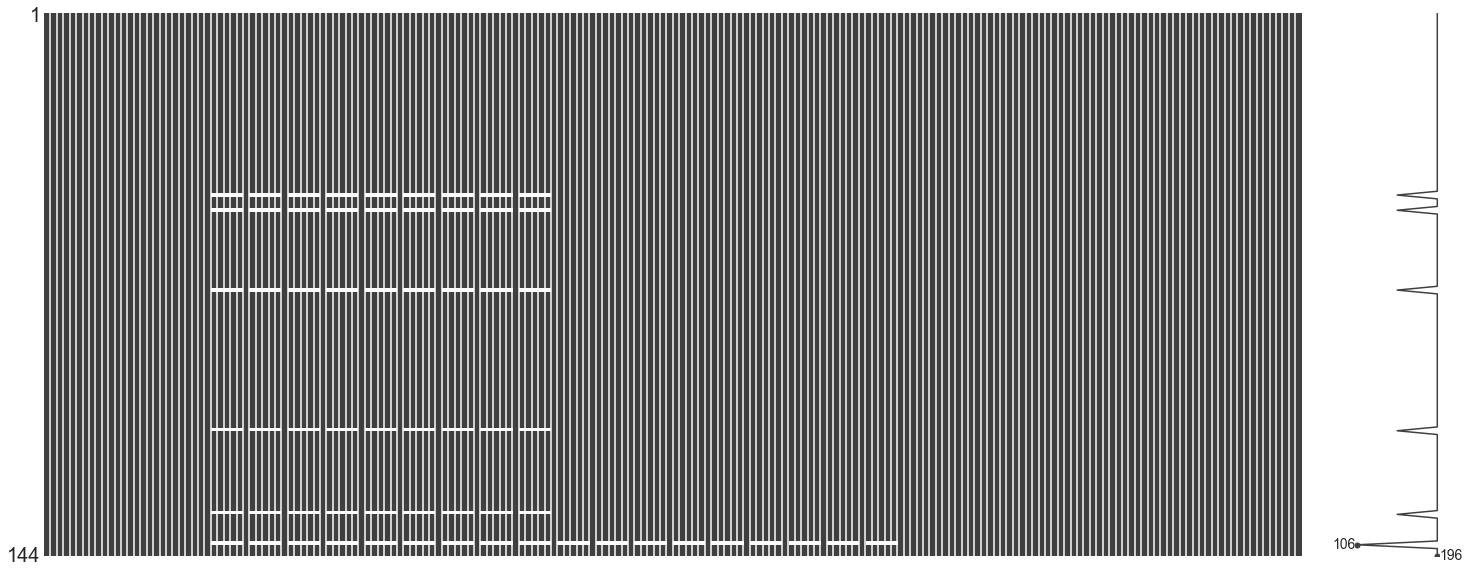

In [11]:
miss.matrix(df)

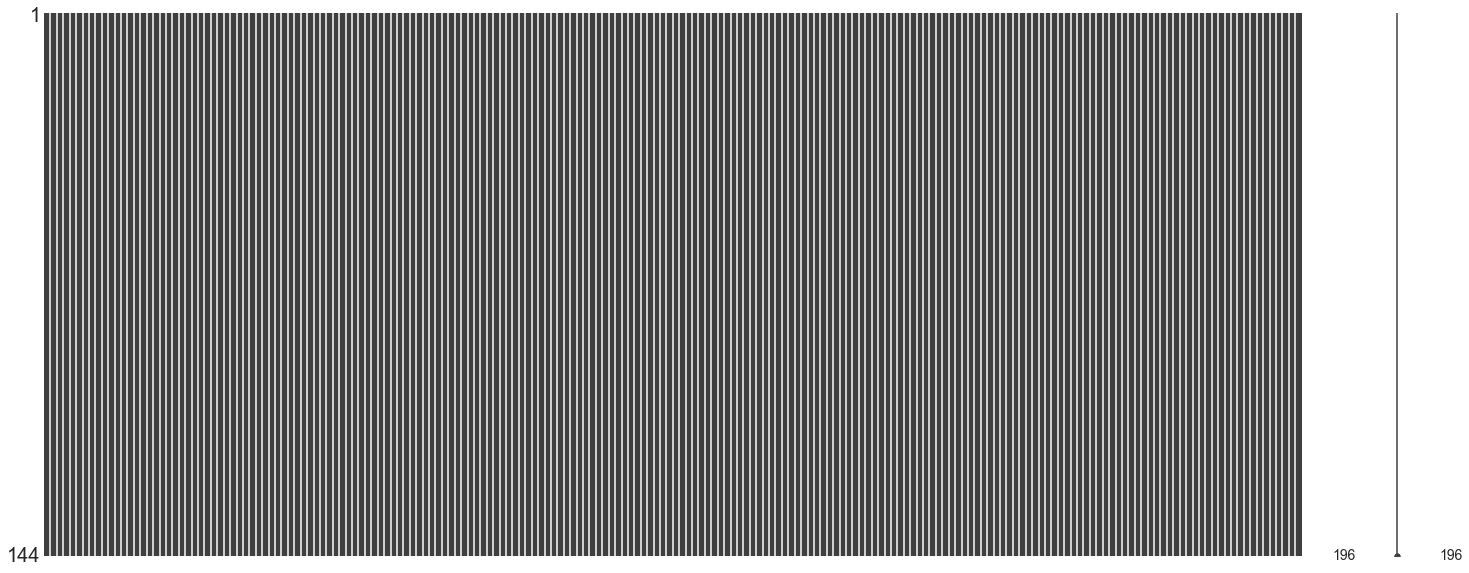

In [12]:
## fill na with zero
df = df.fillna(0)
miss.matrix(df) 

# Dependent Variable

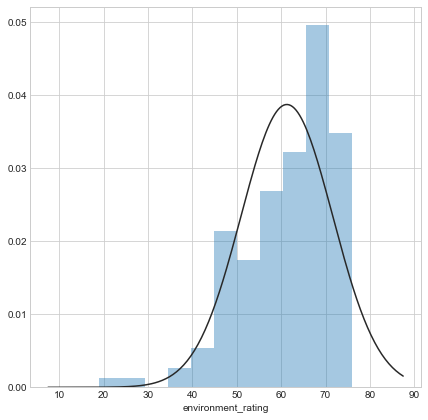

In [30]:
## distribution of dependent variable

fig, ax = plt.subplots(figsize = (7, 7))
ax = sns.distplot(df['environment_rating'], fit=norm, kde=False)

### Testing LN Function

In [148]:
def var_to_ln(df, col):

    df['LN'+col] =  np.log(df[col] + 1)
    original = df[col]
    new_ln = df['LN'+col]
    

    # compare distributions
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize = (10,4))
    sns.distplot(original, ax=ax1) 
    sns.distplot(new_ln, ax=ax2) 
    
    return new_ln

## Company Variables

##### State vs. Environmental Rating

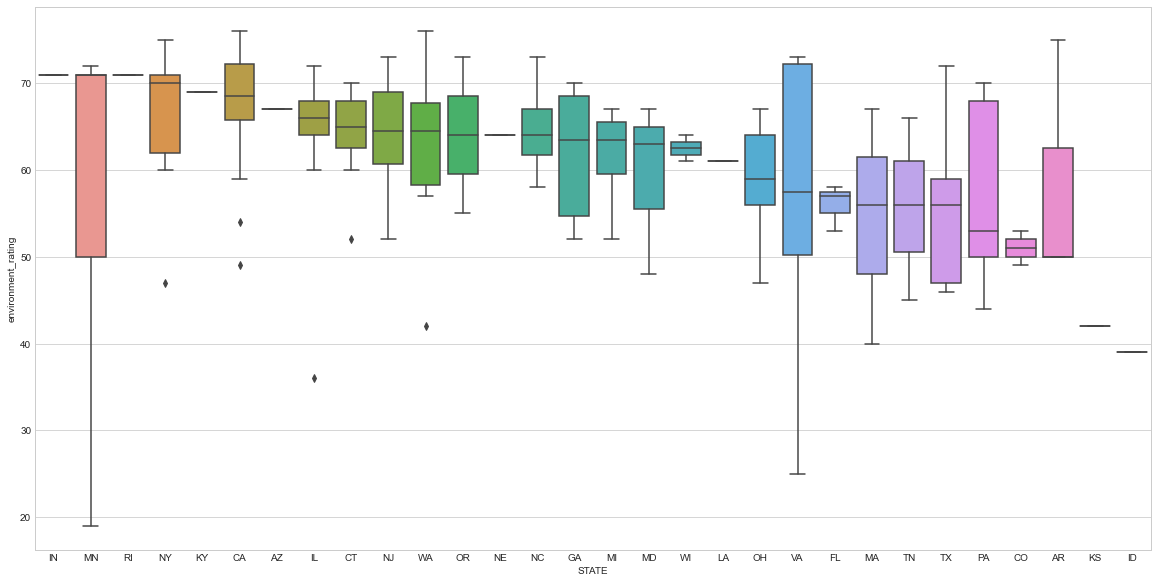

In [21]:
state_order = df.groupby("STATE")['environment_rating'].median().sort_values()[::-1].index

fig, ax = plt.subplots(figsize = (20, 10))
## sns.boxplot(x='STATE', y='environment_rating', data=df, order = state_order)

##### Distribution of Employees

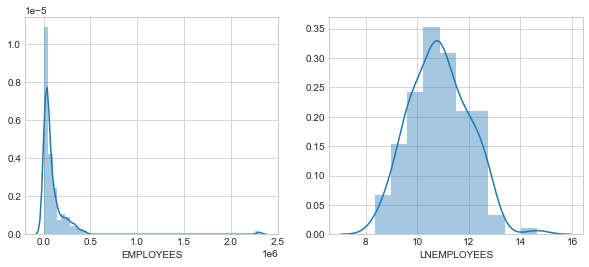

In [149]:
df['LN_EMPLOYEES'] = var_to_ln(df, 'EMPLOYEES')

##### Distribution of Revenues

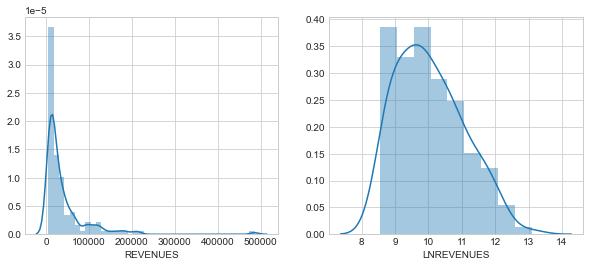

In [150]:
df['LN_REVENUES'] = var_to_ln(df, 'REVENUES')

##### Distribution of Profits

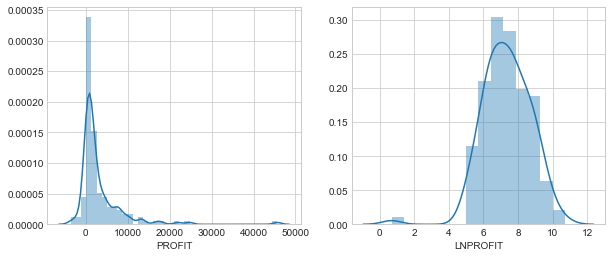

In [153]:
df['LN_PROFIT'] = var_to_ln(df, 'PROFIT')

## Instagram Variables

##### Divide Columns into subgroups

In [24]:
## sort columns by aggregations

mean_columns = [col for col in df.columns if 'mean' in col]
median_columns = [col for col in df.columns if 'median' in col]
sum_columns = [col for col in df.columns if 'sum' in col]
std_columns = [col for col in df.columns if 'std' in col]
min_columns = [col for col in df.columns if 'amin' in col]
max_columns = [col for col in df.columns if 'amax' in col]



In [79]:
## set average instagram variables

instagram_columns = [
    "('is_video', 'mean')",
    "('is_sponsored', 'mean')",
    "('likes', 'mean')",
    "('comments', 'mean')",
    "('likes+comments', 'mean')",
    "('caption_num_words', 'mean')",
    "('caption_unique_words', 'mean')",
    "('mention_counts', 'mean')",  
    "('hashtag_counts', 'mean')",
    "('emoji_counts', 'mean')",
]


### Iteratively Plot

In [128]:
def scatter_plot(cols_list, df, Y, n_rows):
    ## turn list into dataframe
    graphing_df = df[instagram_columns]
    
    ## set # of columns based on # of vars
    l = len(cols_list)
    n_cols = round((l/n_rows),0) + 1
    
    ## set size of figure
    fig_length = n_cols*4

    
    fig, ax = plt.subplots(figsize = (12, fig_length))
    ## plot
    for i, col in enumerate(graphing_df.columns):
        plt.subplot(n_cols,n_rows, i+1)
        feature = graphing_df.columns.values[i]
        sns.scatterplot(x=graphing_df[feature],y=Y,ax=plt.gca())
        ftitle = feature.split(',')[0].replace("('", "").replace("'", "")
        plt.title(ftitle,fontsize=18)
        #plt.title(col)
        #plt.axis('off')
    plt.tight_layout()

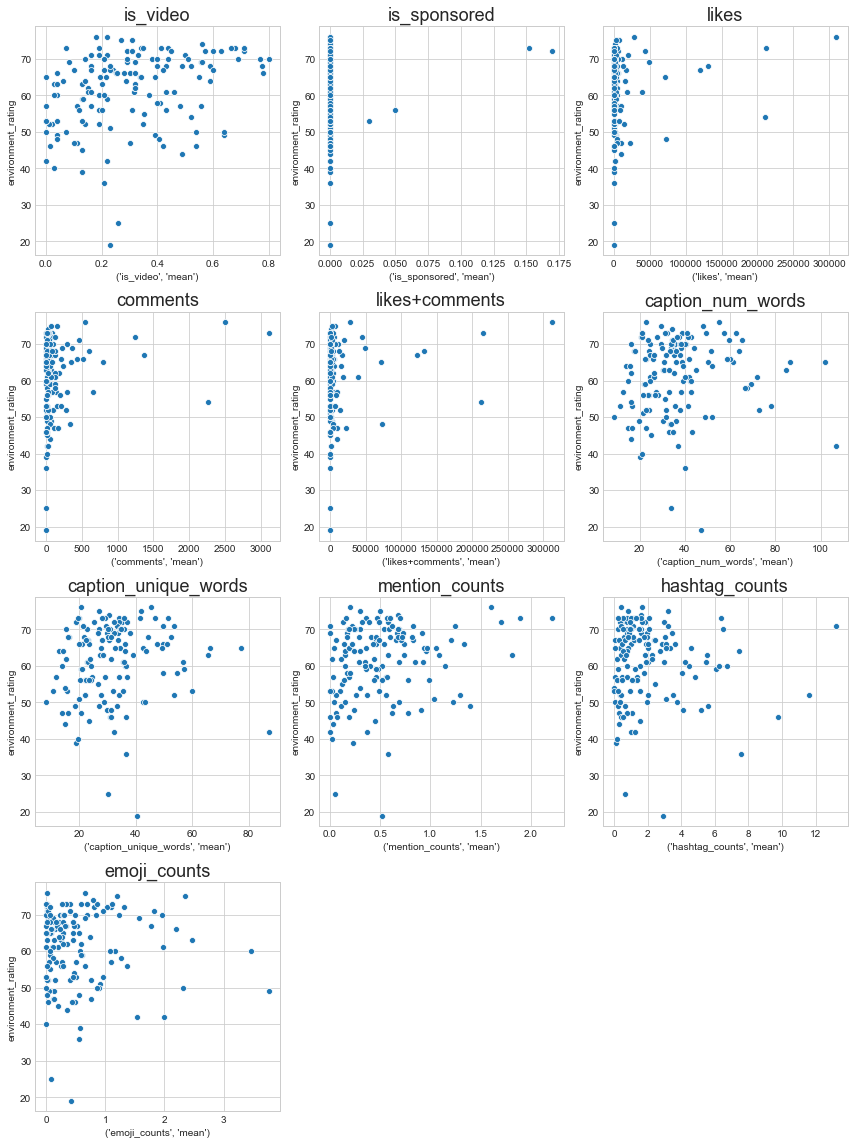

In [129]:
## plot average instagram variables

scatter_plot(instagram_columns, df, df['environment_rating'], 3)

### LN All 'likes' and 'comments' variables

In [154]:
## select any column with likes, comments

likes_columns = [col for col in df.columns if 'likes' in col]
comments_columns = [col for col in df.columns if 'comments' in col]

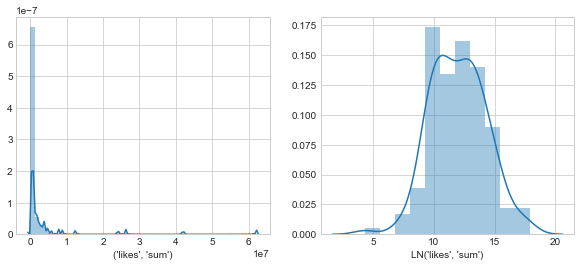

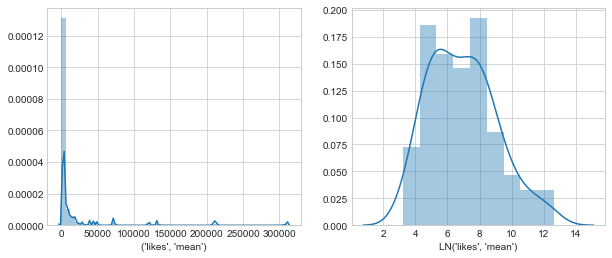

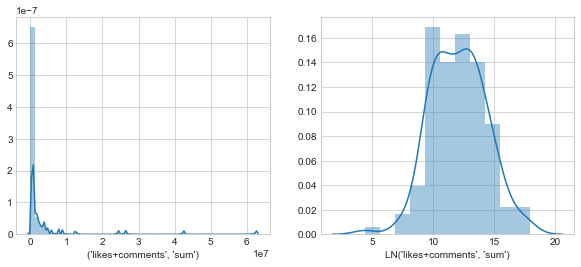

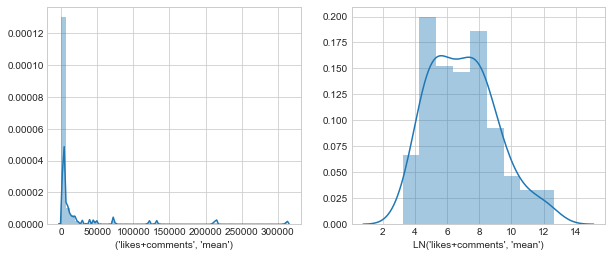

In [156]:
## ln all of the likes 

for col in likes_columns:
    df['LN'+col] = var_to_ln(df, col)


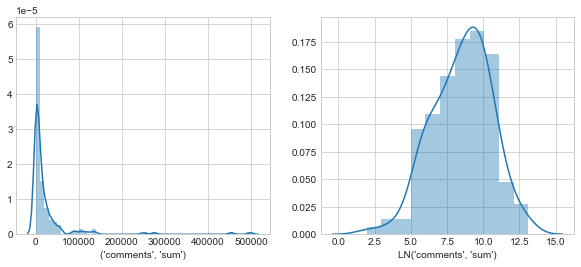

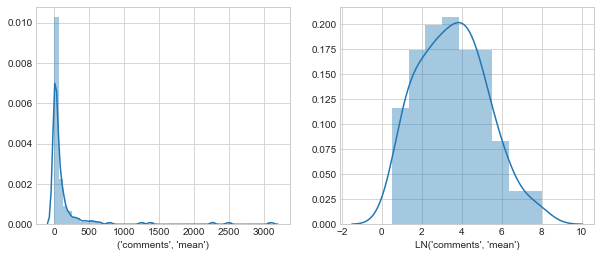

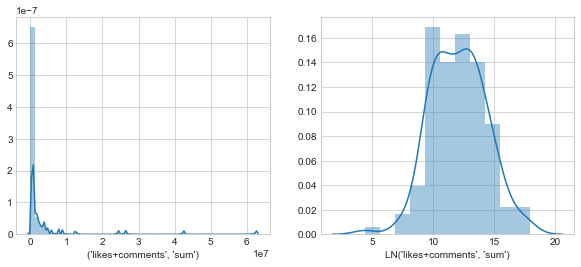

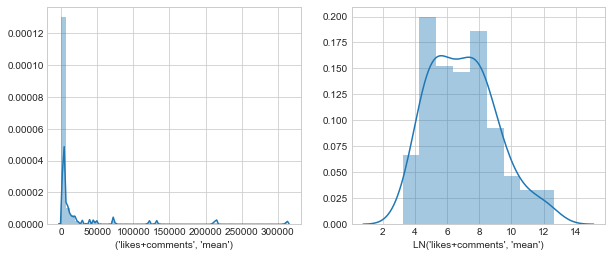

In [157]:
## ln all of the comments 

for col in comments_columns:
    df['LN'+col] = var_to_ln(df, col)

## Green Words Variables

In [162]:
#green_words = ["eco", "eco-friendly","green", "organic", "clean", "sustainable", "sustainability", "carbon", "emissions"]

greenwords = open("greenwords.txt", "r")
greenwords = greenwords.readlines()

#std_columns = [col for col in df.columns if 'std' in col]
list1

['eco, eco-friendly, green, organic, clean, sustainable, sustainability, carbon, emissions\n']

In [59]:
## add column for sum of all green words per company

df['total_green_mentions'] = df["('mentions_eco', 'sum')"] + df["('mentions_eco-friendly', 'sum')"] + df["('mentions_green', 'sum')"] + df["('mentions_organic', 'sum')"] +df["('mentions_clean', 'sum')"] + df["('mentions_sustainable', 'sum')"] + df["('mentions_sustainability', 'sum')"] + df["('mentions_carbon', 'sum')"] + df["('mentions_emissions', 'sum')"] 
df['total_green_hashtags'] = df["('hashtags_eco', 'sum')"] + df["('hashtags_eco-friendly', 'sum')"] + df["('hashtags_green', 'sum')"] + df["('hashtags_organic', 'sum')"] +df["('hashtags_clean', 'sum')"] + df["('hashtags_sustainable', 'sum')"] + df["('hashtags_sustainability', 'sum')"] + df["('hashtags_carbon', 'sum')"] + df["('hashtags_emissions', 'sum')"]
df['total_green_caption'] = df["('caption_eco', 'sum')"] + df["('caption_eco-friendly', 'sum')"] + df["('caption_green', 'sum')"] + df["('caption_organic', 'sum')"] +df["('caption_clean', 'sum')"] + df["('caption_sustainable', 'sum')"] + df["('caption_sustainability', 'sum')"] + df["('caption_carbon', 'sum')"] + df["('caption_emissions', 'sum')"]

df['total_green'] = df['total_green_mentions'] + df['total_green_hashtags'] + df['total_green_caption']

In [ ]:
## plot green 

scatter_plot(instagram_columns, df, df['environment_rating'], 3)

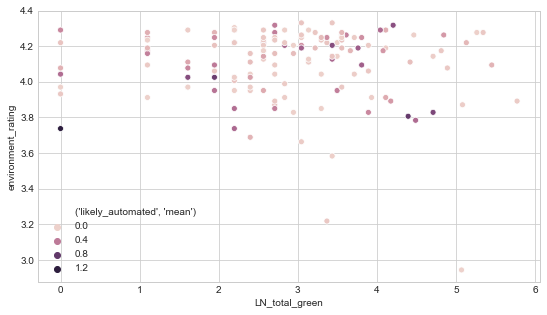

In [76]:
plt.figure(figsize=(9,5))
sns.scatterplot(x=df['LN_total_green'],y=d['environment_rating'],ax=plt.gca(), hue = df["('likely_automated', 'mean')"])